In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Imputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import collections

## Train Data!
---

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.drop(columns=['Ticket', 'Name', 'Cabin', 'Embarked'], inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
def check_missing_data(df):
    columns = df.columns
    for i in columns:
        if pd.isna(df[i]).sum(axis = 0) > 0:
            print('Column: {} has {} NaN value'.format(i, pd.isna(df[i]).sum(axis = 0)))
            
check_missing_data(df_train)

Column: Age has 177 NaN value


In [6]:
df_train.plot.scatter('Age', 'PassengerId')

In [7]:
# Fill Values
#df_train['Age'][df_train.Age > 0].mean()
df_train['Age'] = df_train['Age'].fillna(value=df_train['Age'][df_train.Age > 0].mean())
check_missing_data(df_train)

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [10]:
# Forecasters
forecasters_train = df_train.iloc[:, 2:8].values
forecasters_train

array([[3, 'male', 22.0, 1, 0, 7.25],
       [1, 'female', 38.0, 1, 0, 71.2833],
       [3, 'female', 26.0, 0, 0, 7.925],
       ...,
       [3, 'female', 29.69911764705882, 1, 2, 23.45],
       [1, 'male', 26.0, 0, 0, 30.0],
       [3, 'male', 32.0, 0, 0, 7.75]], dtype=object)

In [11]:
# Classes
classes_train = df_train.iloc[:, 1].values
classes_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [12]:
# LABEL ENCODER
forecasters_label_encoder = LabelEncoder()
forecasters_train[:, 0] = forecasters_label_encoder.fit_transform(forecasters_train[:, 0])
forecasters_train[:, 1] = forecasters_label_encoder.fit_transform(forecasters_train[:, 1])
forecasters_train[:, 3] = forecasters_label_encoder.fit_transform(forecasters_train[:, 3])
forecasters_train[:, 4] = forecasters_label_encoder.fit_transform(forecasters_train[:, 4])
forecasters_train

array([[2, 1, 22.0, 1, 0, 7.25],
       [0, 0, 38.0, 1, 0, 71.2833],
       [2, 0, 26.0, 0, 0, 7.925],
       ...,
       [2, 0, 29.69911764705882, 1, 2, 23.45],
       [0, 1, 26.0, 0, 0, 30.0],
       [2, 1, 32.0, 0, 0, 7.75]], dtype=object)

In [13]:
# ONE HOT ENCODER
one_hot_encoder = OneHotEncoder(categorical_features=[0, 1])
forecasters_train = one_hot_encoder.fit_transform(forecasters_train).toarray()
forecasters_train

/home/martoso/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/martoso/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.75  ]])

In [14]:
# SCALING
scaler = StandardScaler()
forecasters_train = scaler.fit_transform(forecasters_train)
forecasters_train

array([[-0.56568542, -0.51015154,  0.90258736, ...,  0.49004387,
        -0.47367361, -0.50244517],
       [ 1.76776695, -0.51015154, -1.10792599, ...,  0.49004387,
        -0.47367361,  0.78684529],
       [-0.56568542, -0.51015154,  0.90258736, ..., -0.50455542,
        -0.47367361, -0.48885426],
       ...,
       [-0.56568542, -0.51015154,  0.90258736, ...,  0.49004387,
         2.00893337, -0.17626324],
       [ 1.76776695, -0.51015154, -1.10792599, ..., -0.50455542,
        -0.47367361, -0.04438104],
       [-0.56568542, -0.51015154,  0.90258736, ..., -0.50455542,
        -0.47367361, -0.49237783]])

## Test Data!
---

In [15]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
df_test_class = pd.read_csv('gender_submission.csv')
df_test_class.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [17]:
df_test.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [18]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
check_missing_data(df_test)

Column: Age has 86 NaN value
Column: Fare has 1 NaN value


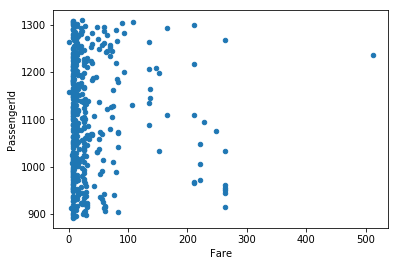

In [20]:
df_test.plot.scatter('Fare', 'PassengerId')

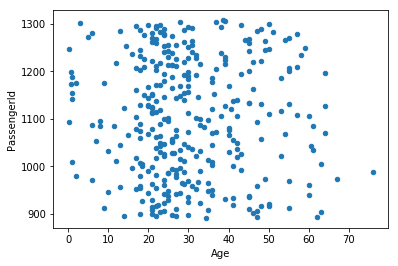

In [21]:
df_test.plot.scatter('Age', 'PassengerId')

In [22]:
#df_test['Age'] = df_test['Age'].fillna(value=df_test['Age'][df_test.Age > 0].mean())
df_test['Age'] = df_test['Age'].fillna(value=df_test['Age'][df_test.Age > 0].mean())
#df_test['Age'][df_test.Age > 0].mean()
df_test['Fare'] = df_test['Fare'].fillna(value=df_test['Fare'][df_test.Age < 500].mean())
check_missing_data(df_test)

In [23]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [24]:
forecasters_test = df_test.iloc[:, 1:7].values
forecasters_test

array([[3, 'male', 34.5, 0, 0, 7.8292],
       [3, 'female', 47.0, 1, 0, 7.0],
       [2, 'male', 62.0, 0, 0, 9.6875],
       ...,
       [3, 'male', 38.5, 0, 0, 7.25],
       [3, 'male', 30.272590361445783, 0, 0, 8.05],
       [3, 'male', 30.272590361445783, 1, 1, 22.3583]], dtype=object)

In [25]:
classes_test= df_test_class.iloc[:, 1].values
classes_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [26]:
# LABEL ENCODER
forecasters_test_label_encoder = LabelEncoder()
forecasters_test[:, 0] = forecasters_test_label_encoder.fit_transform(forecasters_test[:, 0])
forecasters_test[:, 1] = forecasters_test_label_encoder.fit_transform(forecasters_test[:, 1])
forecasters_test[:, 3] = forecasters_test_label_encoder.fit_transform(forecasters_test[:, 3])
forecasters_test[:, 4] = forecasters_test_label_encoder.fit_transform(forecasters_test[:, 4])
forecasters_test

array([[2, 1, 34.5, 0, 0, 7.8292],
       [2, 0, 47.0, 1, 0, 7.0],
       [1, 1, 62.0, 0, 0, 9.6875],
       ...,
       [2, 1, 38.5, 0, 0, 7.25],
       [2, 1, 30.272590361445783, 0, 0, 8.05],
       [2, 1, 30.272590361445783, 1, 1, 22.3583]], dtype=object)

In [27]:
# # ONE HOT ENCODER
one_hot_encoder_test = OneHotEncoder(categorical_features=[0, 1])
forecasters_test = one_hot_encoder_test.fit_transform(forecasters_test).toarray()
forecasters_test

/home/martoso/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/martoso/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.8292],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  1.    , 22.3583]])

In [28]:
# SCALING
scaler = StandardScaler()
forecasters_test = scaler.fit_transform(forecasters_test)
forecasters_test

array([[-0.58655899, -0.5349335 ,  0.95782629, ..., -0.53218141,
        -0.42394557, -0.49840706],
       [-0.58655899, -0.5349335 ,  0.95782629, ...,  0.68340235,
        -0.42394557, -0.51327429],
       [-0.58655899,  1.86939125, -1.04403065, ..., -0.53218141,
        -0.42394557, -0.46508846],
       ...,
       [-0.58655899, -0.5349335 ,  0.95782629, ..., -0.53218141,
        -0.42394557, -0.50879189],
       [-0.58655899, -0.5349335 ,  0.95782629, ..., -0.53218141,
        -0.42394557, -0.4944482 ],
       [-0.58655899, -0.5349335 ,  0.95782629, ...,  0.68340235,
         0.68361223, -0.23790598]])

In [29]:
forecasters_test

array([[-0.58655899, -0.5349335 ,  0.95782629, ..., -0.53218141,
        -0.42394557, -0.49840706],
       [-0.58655899, -0.5349335 ,  0.95782629, ...,  0.68340235,
        -0.42394557, -0.51327429],
       [-0.58655899,  1.86939125, -1.04403065, ..., -0.53218141,
        -0.42394557, -0.46508846],
       ...,
       [-0.58655899, -0.5349335 ,  0.95782629, ..., -0.53218141,
        -0.42394557, -0.50879189],
       [-0.58655899, -0.5349335 ,  0.95782629, ..., -0.53218141,
        -0.42394557, -0.4944482 ],
       [-0.58655899, -0.5349335 ,  0.95782629, ...,  0.68340235,
         0.68361223, -0.23790598]])

In [30]:
classes_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [39]:
estimator = KNeighborsClassifier(n_neighbors=15, p=2, metric='minkowski')
estimator.fit(forecasters_train, classes_train)
predictions = estimator.predict(forecasters_test)

In [40]:
count = collections.Counter(classes_test)
print('Line Base Classifier {:.2f}%'.format(count[0]/(count[0]+count[1])*100))

Line Base Classifier 64.59%


In [41]:
precision = accuracy_score(classes_test, predictions)
print('Precision: {:.2f}%'.format(precision * 100))

Precision: 93.54%


In [42]:
matrix = confusion_matrix(classes_test, predictions)
print('Confusion Matrix:'
  '\n\t0\t1\n0:\t{}\t{}'
  '\n1:\t{}\t{}'.format(matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]))

Confusion Matrix:
	0	1
0:	254	16
1:	11	137


In [43]:
np.savetxt("predictions.csv", predictions, fmt="%d", delimiter=",")